In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("Adidas US Sales Datasets.csv")

print('Rows:',df.shape[0])
print('colums:',df.shape[1])
print('First 5 Rows',df.head())

df.info()
df.describe()

In [4]:
df.isnull().sum()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

obj_cols = df.select_dtypes(include=['object']).columns
for col in obj_cols:
    df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else "Unknown")

df.drop_duplicates(inplace=True)

for c in ["Price per Unit", "Units Sold", "Total Sales", "Operating Profit", "Operating Margin"]:
    df[c] = pd.to_numeric(df[c].astype(str).str.replace(r"[\$,]", "", regex=True), errors="coerce")

df["Invoice Date"] = pd.to_datetime(df["Invoice Date"], errors="coerce", infer_datetime_format=True)

df["Revenue"]=df["Units Sold"] * df["Price per Unit"]
df["Profit Margin (%)"]=(df["Operating Profit"]/df["Total Sales"])*100
df["Profit per Unit"] = df["Operating Profit"] / df["Units Sold"]

df["Order_Year"] = df["Invoice Date"].dt.year
df["Order_Month"] = df["Invoice Date"].dt.month
df["Order_Month_Name"] = df["Invoice Date"].dt.strftime("%b")

df["City_Region"] = df["City"] + ", " + df["Region"]

df["Invoice Date"].fillna(pd.Timestamp("2020-01-01"), inplace=True)


df["Operating Margin"] = pd.to_numeric(
    df["Operating Margin"].astype(str)
    .str.replace(r"[%$,]", "", regex=True)
    .str.strip(),
    errors="coerce"
)

df["Profit per Unit"] = df["Operating Profit"] / df["Units Sold"]
df["Profit per Unit"] = np.where(
    df["Units Sold"] > 0,
    df["Operating Profit"] / df["Units Sold"],
    np.nan
)
df["Operating Margin"].fillna(0, inplace=True)

df.drop(columns=[col for col in df.columns if "Profit Margin" in col], inplace=True)
df["Profit Margin (%)"] = (df["Operating Profit"] / df["Total Sales"]) * 100

df["Profit per Unit"].fillna(0, inplace=True)

print("=== First 5 rows of dataset ===")
display(df.head())

print("\n=== Missing values after preprocessing ===")
print(df.isnull().sum())

print("\n=== Summary of Derived Columns ===")
print(df[[
    "Units Sold", "Price per Unit", "Revenue",
    "Operating Profit", "Profit Margin (%)",
    "Profit per Unit", "Order_Year", "Order_Month_Name",
    "City_Region"
]].head())

df = df.loc[:, ~df.columns.duplicated()]
print("\n=== Number of duplicate rows ===")
print(df.duplicated().sum())

=== First 5 rows of dataset ===


C:\Users\User\AppData\Local\Temp\ipykernel_6828\1297492100.py:15: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["Invoice Date"] = pd.to_datetime(df["Invoice Date"], errors="coerce", infer_datetime_format=True)
C:\Users\User\AppData\Local\Temp\ipykernel_6828\1297492100.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original 

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Revenue,Profit per Unit,Order_Year,Order_Month,Order_Month_Name,City_Region,Profit Margin (%)
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000,300000,0.0,In-store,60000.0,250.0,2020.0,1.0,Jan,"New York, Northeast",50.0
1,Foot Locker,1185732,2020-02-01,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000,150000,0.0,In-store,50000.0,150.0,2020.0,2.0,Feb,"New York, Northeast",30.0
2,Foot Locker,1185732,2020-03-01,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000,140000,0.0,In-store,40000.0,140.0,2020.0,3.0,Mar,"New York, Northeast",35.0
3,Foot Locker,1185732,2020-04-01,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500,133875,0.0,In-store,38250.0,157.5,2020.0,4.0,Apr,"New York, Northeast",35.0
4,Foot Locker,1185732,2020-05-01,Northeast,New York,New York,Men's Apparel,60.0,900,540000,162000,0.0,In-store,54000.0,180.0,2020.0,5.0,May,"New York, Northeast",30.0



=== Missing values after preprocessing ===
Retailer                0
Retailer ID             0
Invoice Date            0
Region                  0
State                   0
City                    0
Product                 0
Price per Unit          0
Units Sold              0
Total Sales             0
Operating Profit        0
Operating Margin        0
Sales Method            0
Revenue                 0
Profit per Unit         0
Order_Year           5583
Order_Month          5583
Order_Month_Name     5583
City_Region             0
Profit Margin (%)       4
dtype: int64

=== Summary of Derived Columns ===
   Units Sold  Price per Unit  Revenue  Operating Profit  Profit Margin (%)  \
0        1200            50.0  60000.0            300000               50.0   
1        1000            50.0  50000.0            150000               30.0   
2        1000            40.0  40000.0            140000               35.0   
3         850            45.0  38250.0            133875               

In [5]:
#agreegating data
product_summary = df.groupby("Product", as_index=False).agg({
    "Revenue": "sum",
    "Operating Profit": "sum",
    "Units Sold": "sum",
    "Profit Margin (%)": "mean"
}).sort_values("Revenue", ascending=False)

print("\n=== Top Products by Revenue ===")
print(product_summary.head(10))


sales_method_summary = df.groupby("Sales Method", as_index=False).agg({
    "Revenue": "sum",
    "Operating Profit": "mean",
    "Profit Margin (%)": "mean"
}).sort_values("Revenue", ascending=False)

print("\n=== Revenue by Sales Method ===")
print(sales_method_summary)



region_summary = df.groupby("Region", as_index=False).agg({
    "Revenue": "sum",
    "Operating Profit": "sum",
    "Profit Margin (%)": "mean",
}).sort_values("Revenue", ascending=False)

print("=== Revenue by Region ===")
print(region_summary)


=== Top Products by Revenue ===
                     Product     Revenue  Operating Profit  Units Sold  \
2      Men's Street Footwear  27676419.0          82802323      593320   
3            Women's Apparel  23833180.0          68610996      433052   
1    Men's Athletic Footwear  20577180.0          51846964      435526   
5    Women's Street Footwear  17198825.0          45095897      392269   
0              Men's Apparel  16523632.0          44763099      306758   
4  Women's Athletic Footwear  14319021.0          39028343      317236   

   Profit Margin (%)  
2          44.613215  
3          44.179105  
1          40.270587  
5          41.020763  
0          41.322911  
4          42.446907  

=== Revenue by Sales Method ===
  Sales Method     Revenue  Operating Profit  Profit Margin (%)
1       Online  44977705.0      19766.940082          46.424634
2       Outlet  39484027.0      35740.027502          39.492426
0     In-store  35666525.0      73347.058621          35.62993

C:\Users\User\AppData\Local\Temp\ipykernel_6828\3333440516.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sales Method", palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_6828\3333440516.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Region")


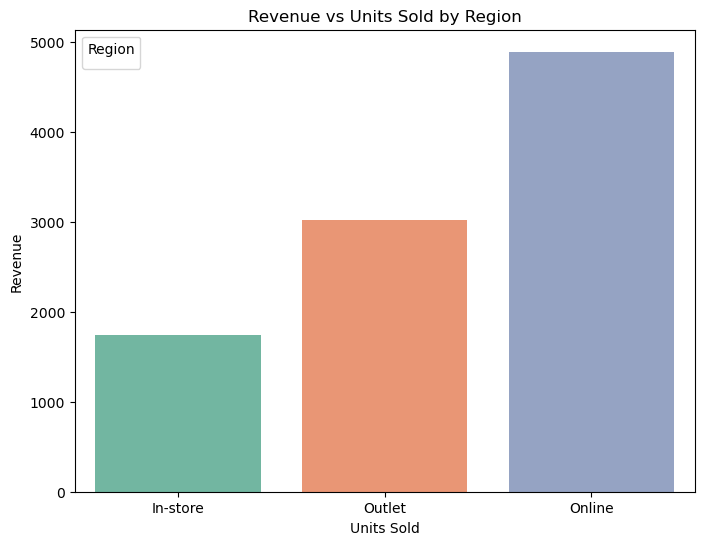

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Sales Method", palette="Set2")
plt.title("Revenue vs Units Sold by Region")
plt.xlabel("Units Sold")
plt.ylabel("Revenue")
plt.legend(title="Region")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11756\3076433769.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Region", y="Profit Margin (%)", palette="Pastel1")


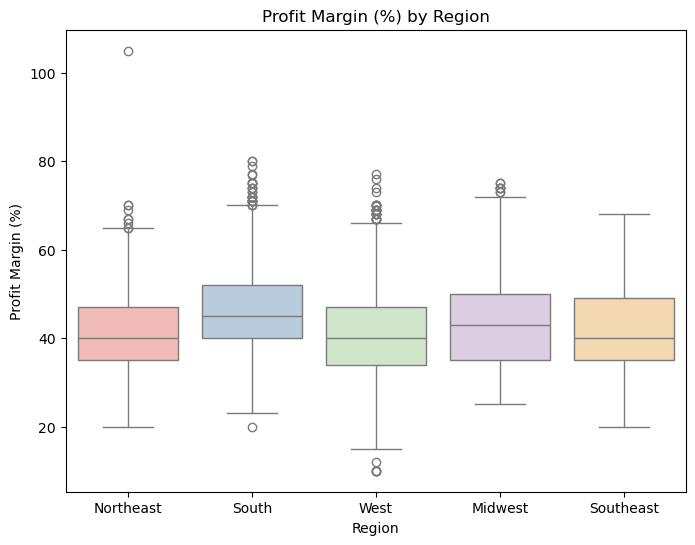

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Region", y="Profit Margin (%)", palette="Pastel1")
plt.title("Profit Margin (%) by Region")
plt.xlabel("Region")
plt.ylabel("Profit Margin (%)")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11756\809724731.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Order_Month_Name", y="Revenue", hue="Region", estimator="sum", ci=None)


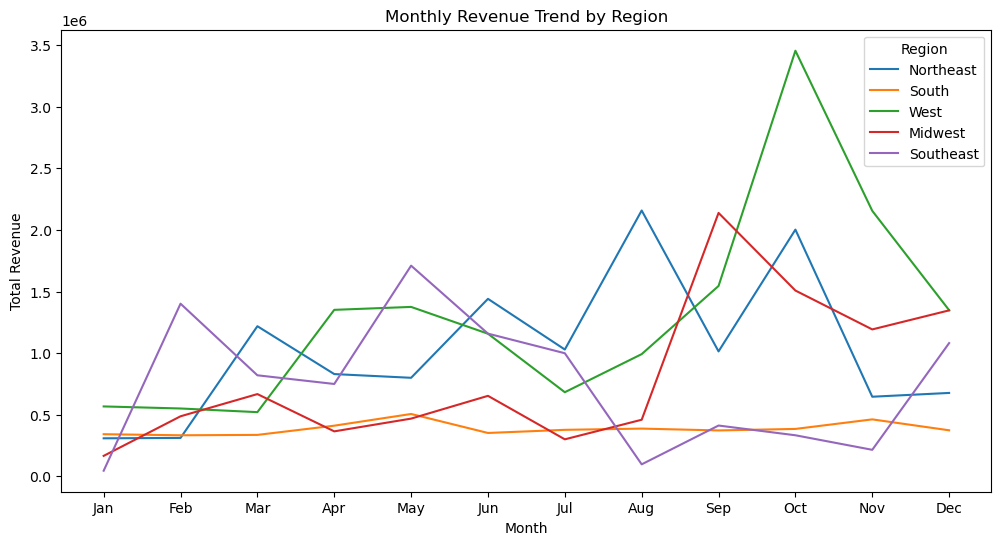

In [46]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Order_Month_Name", y="Revenue", hue="Region", estimator="sum", ci=None)
plt.title("Monthly Revenue Trend by Region")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.legend(title="Region")
plt.show()

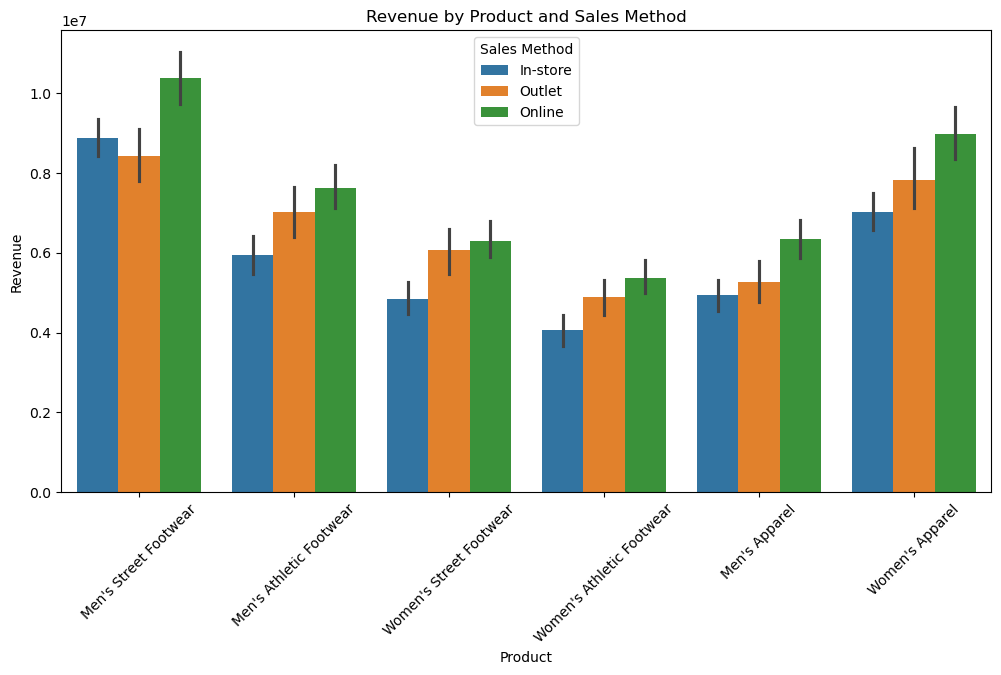

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Product", y="Revenue", hue="Sales Method", estimator="sum")
plt.title("Revenue by Product and Sales Method")
plt.xticks(rotation=45)
plt.show()


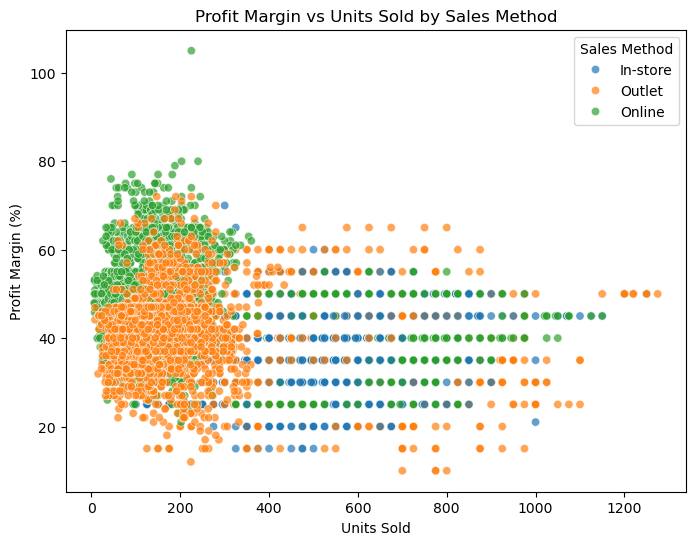

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Units Sold", y="Profit Margin (%)", hue="Sales Method", alpha=0.7)
plt.title("Profit Margin vs Units Sold by Sales Method")
plt.xlabel("Units Sold")
plt.ylabel("Profit Margin (%)")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11756\322385733.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x="Revenue", y="City", palette="viridis")


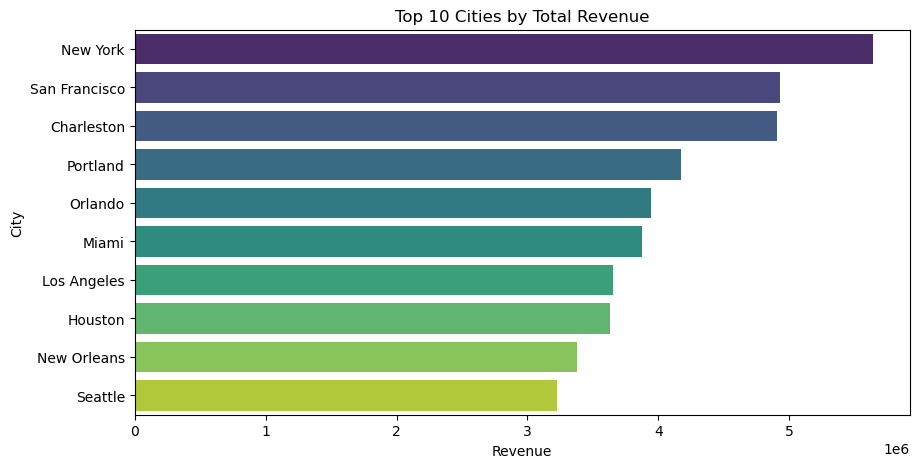

In [50]:
top_cities = df.groupby("City")["Revenue"].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=top_cities, x="Revenue", y="City", palette="viridis")
plt.title("Top 10 Cities by Total Revenue")
plt.xlabel("Revenue")
plt.ylabel("City")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11756\528726596.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby("Product")["Revenue"].sum().reset_index(),


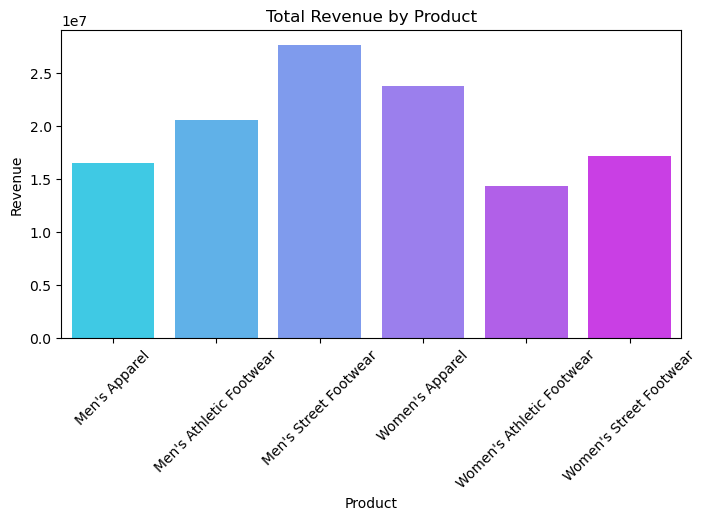

In [52]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df.groupby("Product")["Revenue"].sum().reset_index(),
            x="Product", y="Revenue", palette="cool")
plt.title("Total Revenue by Product")
plt.xticks(rotation=45)
plt.show()